# Cambio de coordenadas y regla de la cadena

In [1]:
import time
print(' Última ejecución ', time.asctime() )

 Última ejecución  Thu Jan 25 13:33:56 2024


### Objectivos


Aprender a hacer cambios de coordenadas

Mostrar la regla de la cadena y algunos usos.

In [2]:
# general imports
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import graph_utils as gf

### Cambio de variables


La siguiente función es el potencial de una carga eléctrica, $q$ en el espacio:

$$
V(x, y, z) = k \frac{q}{\sqrt{x^2 + y^2 + z^2}}
$$

El potencial sabemos que es radial, que solo depende de la distancia a la carga, $r = \sqrt{x^2 + y^2 + z^2}$.

Podemos expresar el potencial en *coordenadas cartesianas*, como en la anterior ecuación, pero también, de forma más sencilla, en *coordenadas esféricas*, donde la variable $r$ es la distancia al origen, así:

$$
V(r) = k \frac{q}{r}
$$

En este caso solo depende de $r$

En la sección de parametrización de superficies, vimos que podíamos dar la pared de un cilindro de radio $r$, y altura infinita como:


$$
\sigma(\phi, z) = ( r \cos \phi, r \sin \phi, z)
$$

Donde el radio, $r$, era una constante. Si consideramos ahora que $r$ puede tomar todos los valores de $[0, \infty)$. El conjunto de todos los cilindros *cubre*, mapea, el espacio tridimensional. 


/Users/Xabier/Library/CloudStorage/OneDrive-UniversidadedeSantiagodeCompostela/Docencia/PCD_PTU/MM3/2324/USC-MMIII/notebooks/graph_utils.py:311: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax  = plt.gca(projection='3d')


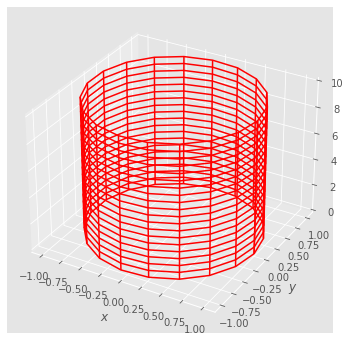

In [3]:
phi_range = (0, 2*np.pi, 20)
z_range   = (0,      10, 20)
r = 1.
funx = lambda phi, z: r  * np.cos(phi)
funy = lambda phi, z: r  * np.sin(phi)
funz = lambda phi, z: z
gf.wfsurface(funx, funy, funz, phi_range, z_range);

Podemos dar todos los puntos, $(x, y, z)$, de un espacio $\mathrm{R}^3$ en *coordenadas cilíndricas*, donde expresamos las coordenadas $(x, y)$ por, $(r, \phi)$ donde $r$ es la distancia al origen y $\phi$ el ángulo con el eje $x$. Mientras que mantenemos la coordenada $z$. Esto es:

$$
(r, \phi, z) \to (x, y, z)
$$

Donde:

$$
x = r \cos \phi, \;\,
y = r \sin \phi, \;\,
z = z
$$

El dominio en cilíndricas es $r \in [0, \infty)$, $\phi \in [0, 2 \pi)$, mientras que $z$ es todo $\mathrm{R}$.


*Cuestión*: ¿Cuál es la transformación inversa, de cartesianas a cilíndricas?

La transformación inversa, de *cilíndricas* a *cartesianas* viene dada por:
    
$$
r = \sqrt{x^2 + y^2}, \, \cos \phi =  \frac{x}{\sqrt{x^2 + y^2}}, \;\, z = z
$$

Si recuerdas, también parametrizamos una esfera de radio $r$:

$$
\sigma(\theta, \phi) = (r \cos \phi \sin \theta, \; r \sin \phi \sin \theta, \; r \cos \theta)
$$

Considerando ahora todas las posibles esferas, esto es variando $r$ de $[0, \infty)$ podemos cubrir de nuevo todo el espacio tri-dimensional, $\mathrm{R}^3$


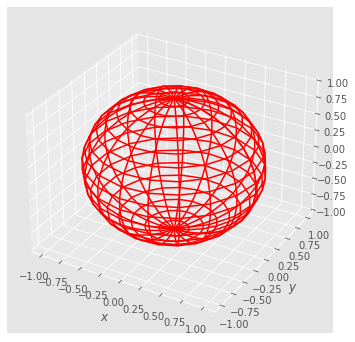

In [4]:
theta_range = 0.,    np.pi, 20
phi_range   = 0., 2.*np.pi, 20
r = 1.
funx = lambda theta, phi : r * np.cos(phi) * np.sin(theta)
funy = lambda theta, phi : r * np.sin(phi) * np.sin(theta)
funz = lambda theta, phi : r               * np.cos(theta)
gf.wfsurface(funx, funy, funz, theta_range, phi_range);

Las *coordenadas esféricas* nos permiten asociar cualquier punto del espacio, $(x, y, z)$, de $\mathrm{R}^3$, a un radio, $r$, la distancia del punto al origen, el ángulo $\theta$ que forma el punto con el eje $z$, y el ángulo que forma la proyección del punto en el plano $(x, y)$ en el eje $x$.

El cambio en esféricas viene dado por:

$$
 x = r \cos \phi \sin \theta, \;\, y = r \cos \phi \sin \theta, \;\, z = r \cos \theta
$$

Donde el rango de $\theta$ es $[0, \pi]$ y el de $\phi$ de $[0, 2 \pi)$.

Con $\theta = 0, \pi$ damos los polos de la esfera, con $\theta = \pi/2$ su ecuador. Situados a una altura de la esfera, el ángulo $\phi$, nos permite recorrerla en una circuferencia de radio $r \sin \theta$ en sentido antihorario (visto desde arriba). En el ecuador, claro está, con radio $r$.


*Cuestión:* ¿Cuál es el cambio inverso que nos pasa de cartesianas a esféricas?

El cambio inverso de cartesianas a esféricas, viene dado por:
    
$$
r = \sqrt{x^2 + y^2 + z^2}, \;\, \cos \phi = \frac{x}{\sqrt{x^2 + y^2}}, \;\, \cos \theta = \frac{z}{\sqrt{x^2 + y^2 + z^2}}
$$


#### Cambios de coordenadas

Los cambios de coordenadas son por lo tanto funciones vectoriales, ${\bf f}: \mathrm{R}^n \to \mathrm{R}^n$, diferenciables, biyectivas (a excepción de algún punto singular) y que admiten una función inversa también diferenciable.

*Nota:* Una función biyectica asociada a cada punto de espacio inicial un punto distinto en el espacio imagen, y todo punto del espacio imagen tiene un punto en el inicial. Fíjate que hay algunos puntos singulares que no cumplen esto, como los polos en el cambio a esféricas y cuando $r = 0$ para las dos. Sin embargo esto no nos impide cubrir completamente el espacio $\mathrm{R}^3$


#### Matriz jacobiana del cambio de coordenadas

Vamos a calcular la matriz jacobiana de los cambios de coordenadas a cilíndricas.

la función vectorial del cambio de coordenadas a cilíndricas es:

$$
{\bf x}(r, \phi, z) \; =  \, \left( r \cos \phi, \, r \sin \phi, \,  z \right)
$$


Y su matriz jacobiana:

$$
{\bf Dx}(r, \phi, z) = \left( \begin{array}{ccc} 
\cos \phi & - r \sin \phi & 0 \\
\sin \phi &   r \cos \phi & 0 \\
        0 &             0 & 1 
\end{array} \right)
$$



la función vectorial del cambio de coordenadas a esféricas es:

$$
{\bf x}(r, \phi, \theta) \; =  \, \left( r \cos \phi \sin \theta, \, r \sin \phi \sin \theta, \,  r \cos \theta \right)
$$


Y su matriz jacobiana:

$$
{\bf Dx}(r, \phi, \theta) = \left( \begin{array}{ccc} 
\cos \phi \sin \theta & - r \sin \phi \sin \theta &  r \cos \phi \cos \theta \\
\sin \phi \sin \theta &   r \cos \phi \sin \theta &  r \sin \phi \cos \theta \\
          \cos \theta &                         0 & -r \sin \theta  
\end{array} \right)
$$



### La regla de la cadena

En determinados casos tenemos una función vectorial, ${\bf f}({\bf x})$,  de $\mathrm{R}^3$, de la que conocemos su derivada, ${\bf Df}({\bf x})$, y nos preguntamos cuál será su derivada en coordenadas cilíndricas o esféricas. 

¿Existe una relación sencilla entre la derivada de la función en las nuevas coordenadas y la derivada en cartesianas?

La respuesta es la regla de la cadena, que nos dice, que la nueva derivada es el producto de la derivada de la primera función y la derivada, la matriz jacobiana, del cambio de variables:

Sea ${\bf f}({\bf x)}$ con derivada, ${\bf Df}({\bf x})$ en cartesianas y ${\bf x}({\bf u})$ un cambio de coordenadas, con matriz jacobiana, ${\bf Dx}({\bf u})$. La función compuesta, ${\bf h} ({\bf u}) = {\bf f} \circ { \bf x}({\bf u}) = {\bf f}\left({\bf x}({\bf u}) \right)$, tiene como derivada:

$$
{\bf Dh}({\bf u}) \; = \; {\bf Df} \left({\bf x( {\bf u})} \right) \; {\bf Dx}({\bf u})
$$

¡El producto de las derivadas!



#### Teorema de la regla de la cadena


*Teorema*: Sea ${\bf g}: A \subset \mathbf{R}^n \to \mathbf{R}^m$, $A$ un conjunto abierto de $\mathbf{R}^n$, y ${\bf f}: B \subset \mathbf{R}^m \to \mathbf{R}^p$, $B$ un conjunto abierto de $\mathbf{R}^m$, donde el dominio de ${\bf f}$ esta incluido en el rango de ${\bf g}$. Si ${\bf g}$ es diferenciable en un punto ${\bf x}$ interior a $A$ y ${\bf f}$ lo es en el punto ${\bf g}({\bf x})$, entonces, la función composición ${\bf h} = {\bf f} \circ {\bf g}: A \subset \mathbf{R}^n \to \mathbf{R}^p$, definida como: ${\bf h}({\bf x})= {\bf f} \circ {\bf g} ({\bf x}) = {\bf f} \left( {\bf g}({\bf x}) \right)$, es diferenciable en ${\bf x}$ y su diferencial es:

$$
{\bf D}({\bf f} \circ {\bf g})({\bf x}) = {\bf Df}\left( {\bf g}({\bf x}) \right) \, {\bf Dg}({\bf x}) 
$$



*Ejemplo*: Con las funciones: $f(x,y)= x^2+y^2$ y ${\bf g}(r,\theta) = (r\cos \theta, r \sin \theta)$, verifica la regla de la cadena para la función compuesta, $h(r,\theta) = (f \circ {\bf g})(r,\theta)$.



*solución:*
Como producto de derivadas:

$$
\nabla f (x,y)  = (2x, \, 2y) \Rightarrow \nabla f (r,\theta)  = (2 r \cos \theta, \, 2 r \sin \theta) 
$$

$$
{\bf Dg}(r,\theta)  = \left( \begin{array}{cc} 
\cos \theta & - r \sin \theta \\
 \sin \theta & r \cos \theta
\end{array} \right) 
$$

$$
\nabla f (r,\theta) \, {\bf Dg} (r,\theta)  =  (2 r \cos \theta, 2 r \sin \theta) \, \left(
\begin{array}{cc} 
\cos \theta & - r \sin \theta \\
 \sin \theta & r \cos \theta
\end{array} \right) = (2r,0) \\
$$

Ahora expresando la función inicial en polares:

$$
 h (r,\theta)  = r^2 
$$

$$
\nabla h (r,\theta) = (2r,0)
$$


*Ejercicio*: Verifica la regla de la cadena para la función compuesta 
 $h = f \circ {\bf g}: \mathbf{R}^3 \to \mathbf{R}$ dada por $g:\mathbf{R}^3 \to \mathbf{R}^3$, ${\bf g}(x,y,z)=(x^2y,y^2,e^{-xz})$ y $f:\mathbf{R}^3\to\mathbf{R}$, $f(u,v,w)=u^2+v^2-w$.


*Solución*:

Sustituyendo:

$$
h(x,y,z)  = (x^2y)^2+(y^2)^2-e^{-xz} 
$$

$$
\nabla h(x,y,z)  =(4x^3y^2+ze^{-xz},2x^4y+4y^3,xe^{-xz}) 
$$

Aplicando la regla de la cadena:

$$
{\bf Dg}(x,y,z)  = \left( \begin{array}{ccc}
2xy & x^2 & 0 \\
0 & 2y & 0 \\
-ze^{-xz} & 0 & -xe^{-xz} \\ \end{array} \right) 
$$

$$
\nabla f(u,v,w) = (2u,2v,-1) \Rightarrow \nabla f(x,y,z) = (2x^2y,2y^2,-1) 
$$

$$
\nabla f(x,y,z) \, {\bf Dg}(x,y,z)  =  (2x^2y,2y^2,-1) \, \left( \begin{array}{ccc}
2xy & x^2 & 0 \\
0 & 2y & 0 \\
-ze^{-xz} & 0 & -xe^{-xz} \\ \end{array} \right)  \\
= (4x^3y^2+ze^{-xz},2x^4y+4y^3,xe^{-xz})
$$




Aplicando la regla de la cadena:

$$
{\bf Dg}(x,y,z)  = \left( \begin{array}{ccc}
2xy & x^2 & 0 \\
0 & 2y & 0 \\
-ze^{-xz} & 0 & -xe^{-xz} \\ \end{array} \right) 
$$

$$
\nabla f(u,v,w) = (2u,2v,-1) \Rightarrow \nabla f(x,y,z) = (2x^2y,2y^2,-1) 
$$

$$
\nabla f(x,y,z) \, {\bf Dg}(x,y,z)  =  (2x^2y,2y^2,-1) \, \left( \begin{array}{ccc}
2xy & x^2 & 0 \\
0 & 2y & 0 \\
-ze^{-xz} & 0 & -xe^{-xz} \\ \end{array} \right)  \\
= (4x^3y^2+ze^{-xz},2x^4y+4y^3,xe^{-xz})
$$



*Ejemplo* del uso de la regla de la cadena: 

**Plano tangente a un conjunto de nivel de una función $f(x, y, z)$**.

Sea un función escalar, $f(x, y, z)$ de $\mathrm{R}^3  \to \mathrm{R}$, y un conjunto de nivel, c, $f(x , y, z) = c$, y una línea, una trayectoria, parametrizada, de puntos de ese conjunto de nivel ${\bf r}(t)$, con $t \in [t_0, t_e]$, donde en $t = t_0$, nos da ${\bf r}(t_0) = (x_0, y_0, z_0)$. 

Si hacemos la función compuesta $h = f \circ \ {\bf r} (t)$, que fíjate, es simplemente una función real de una dimensión, $h(t) = f({\bf r}(t)), \;
\mathrm{R} \to \mathrm{R}$.

En este caso dado, los puntos de ${\bf r}(t)$ están en el conjunto de nivel de $f(x, y, z) = c$, la función siempre vale $c$, y por lo tanto su derivada es nula. 

$$
\frac{\mathrm{d}h(t_0)}{\mathrm{d}t} = 0.
$$

Que por la regla de la cadena es lo mismo que:

$$
\nabla f \left({\bf r}(t_0) \right) \, {\bf r}'(t_0) = 0
$$

Que corresponde a dos vectores ortogonales. El primero es el gradiente de $f(x, y, z)$ en $(x_0, y_0, z_0)$, esto es, $\nabla f(x_0, y_0, z_0)$. El segundo es el vector "velocidad" de la trayectoria en $t_0$.




En un espacio $\mathrm{R}^3$, dado un punto ${\bf x}_0 = (x_0, y_0, z_0)$ y vector ${\bf n}$. Podemos dar la ecuación del plano normal a ${\bf n}$, que pasa por ${\bf x}_0$, como aquellos puntos, ${\bf x} = (x, y, z)$ cuyo vector, ${\bf x} - {\bf x}_0$, $(x - x_0, y - y_0, z - z_0)$, es ortogonal a ${\bf n}$, esto es:

$$
({\bf x} - {\bf x}_0) \, {\bf n} = 0
$$

Si nos fijamos en el caso anterior, la 'velocidad' de la trayectoria, ${\bf r}'(t_0)$, debe estar contenida entonces en el plano definido por el punto $(x_0, y_0, z_0)$ y el vector $\nabla f(x_0, y_0, z_0)$.

Ese plano, que es el plano tangente a al conjunto de nivel $f(x, y, z) = c$ en $(x_0, y_0, z_0)$, viene dado por la ecuación:

$$
({\bf x} - {\bf x}_0) \, \nabla f({\bf x}_0) = 0
$$

$$
f'_x(x_0, y_0, z_0) \, (x - x_0) \, + \, f'_y(x_0, y_0, z_0) \, (y - y_0) + \, f'_z(x_0, y_0, z_0) \, (z - z_0) \, = \, 0.
$$

Date cuenta que esta forma de dar el plano, solo sirve para funciones, $f(x, y, z)$, cuyo gradiente en un punto, $\nabla f(x_0, y_0, z_0)$, sea distinto de cero.

La siguiente celda muestra el plano tangente en un punto al conjunto de nivel de la función $f(x, y, z) = x^2 + y^2 + z^2$ de valor $c=1$, que corresponde a la esfera de radio unidad.

También se muestra el gradiente de la función en el punto de la esfera dado por $\theta = \pi/4, \; \phi = 3\pi/2$, y dos trayectorias dentro de la esfera, una vertical, un meridiano, y otra horizontal, un paralelo, que pasan por ese punto. Puedes ver también los vectores "velocidad" de esas trayectorias, que están, claro, dentro del plano. 

*Explora* y cambia el punto de la esfera.

/Users/Xabier/Library/CloudStorage/OneDrive-UniversidadedeSantiagodeCompostela/Docencia/PCD_PTU/MM3/2324/USC-MMIII/notebooks/graph_utils.py:380: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection='3d')
/Users/Xabier/Library/CloudStorage/OneDrive-UniversidadedeSantiagodeCompostela/Docencia/PCD_PTU/MM3/2324/USC-MMIII/notebooks/graph_utils.py:298: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default k

gradiente   : (8.659560562354932e-17, -1.414213562373095, 1.4142135623730951)
v-paralelo  : (0.7071067811865475, 4.329780281177466e-17, 0.0)
v-meridiano : (4.329780281177467e-17, -0.7071067811865476, -0.7071067811865475)


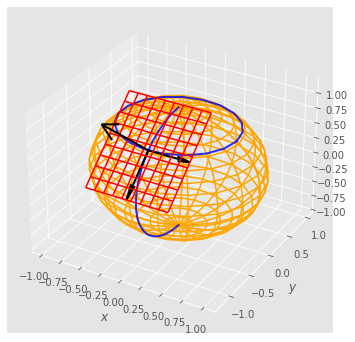

In [5]:
theta0, phi0 = 1*np.pi/4., -1.*np.pi/2.
_, _, grad, vphi, vtheta = gf.sphere_plane(theta0, phi0, 0.5);
print('gradiente   :', grad)
print('v-paralelo  :', vphi)
print('v-meridiano :', vtheta)

*Ejercicio*: Sea la función $f(x, y, z) = x^2 + y^2 + z^2$, y el punto ${\bf x}_0 = \left(0, -1/{\sqrt{2}}, 1/{\sqrt{2}} \right)$, calcula el plano tangente del conjunto de nivel de la función a la que pertenece el punto.

El valor de la función en el punto es $f ({\bf x_0}) = 1$, luego el punto pertenece al conjunto de nivel con valor $c = 1$.

El conjunto de nivel $f(x, y, z) = 1$ es la esfera de radio unidad: $x^2 + y^2 + z^2 = 1$.

El punto ${\bf x}_0$, en coordenadas esféricas es $r = 1, \theta = \pi/4, \phi = 3 \pi/2$.



El gradiente de la función es: $\nabla f (x, y, z) = (2 x, 2y, 2z)$.

Y en el punto ${\bf x}_0$ vale: $\nabla f ({\bf x}_0) = \left(0, -\sqrt{2}, \sqrt{2}\right)$.

El plano tangente, en un punto ${\bf x}_0$ de la esfera cumple la ecuación:

$$
2x_0 (x - x_0) + 2 y_0 (y - y_0) + 2 z_0 (z - z_0) = 0
$$

Y en el punto ${\bf x}_0$  es:

$$
-\sqrt{2} \left( y + \frac{1}{\sqrt{2}} \right) + \sqrt{2} \left( z - \frac{1}{\sqrt{2}} \right) = 0
$$

Por lo tanto el plano tangente tiene como ecuación:

$$ 
z = y + \sqrt{2} 
$$


**¡Aún hay más!**

Las simetrías en Física son fundamentales. Fue la gran física [Emmy Noether](https://es.wikipedia.org/wiki/Emmy_Noether) quien formuló un teorema que afirma que detrás de una simetría hay en Física una cantidad conservada. Por ejemplo, si el problema tiene simetría esférica, la cantidad conservada es el momento angular.

Emmy Noether sufrió desafortunadamentelos los males de su tiempo (y que aún perduran en los nuestros), el machismo de sus compañeros de Universidad y el antisemitismo nazi.


**¡Esto es todo por ahora!**

### Apéndice

*Demostración* de la regla de la cadena
    
Las dos funciones son diferenciables:

$$
{\bf g}({\bf x}+{\bf v}) -{\bf g}({\bf x})  = {\bf Dg}({\bf x})\,{\bf v} 
+ \| {\bf v} \| {\bf E}_g({\bf x,v}) 
$$

$$
{\bf f}({\bf y}+{\bf u}) -{\bf f}({\bf y})  = {\bf Df}({\bf y})\, {\bf u} + \| {\bf u} \| {\bf E}_f({\bf y,u}) 
$$

Como ${\bf u} = {\bf g}({\bf x}+{\bf v}) -{\bf g}({\bf x})$, tenemos:

$$
{\bf f}({\bf y}+{\bf u}) -{\bf f}({\bf y})  = {\bf Df}({\bf y}) \left( {\bf Dg}({\bf x}) \, {\bf v} + \| {\bf v} \| {\bf E}_g({\bf x,v}) \right) 
+ \| {\bf u} \| {\bf E}_f({\bf y,u}) 
$$

$$
=  {\bf Df}({\bf y}){\bf Dg}({\bf x}) \, {\bf v} + \| {\bf v} \| \left( {\bf Df}({\bf y}) \, {\bf E}_g({\bf x,v})  
+ \frac{\| {\bf u} \|}{\| {\bf v} \|} {\bf E}_f({\bf y,u}) \right) 
$$

Que podemos asociar a:

$$
 {\bf h}({\bf x}+{\bf v}) -{\bf h}({\bf x})  =  {\bf Dh}({\bf x}) \, {\bf v} + \| {\bf v} \| {\bf E}_h ({\bf x,v}) 
 $$

Donde

$$
{\bf Dh}({\bf x}) = {\bf Df}({\bf y}) \, {\bf Dg}({\bf x})
$$

$$
{\bf E}_h({\bf x,v})  = {\bf Df}({\bf y}) \, {\bf E}_g({\bf x,v})  + \frac{\| {\bf u} \|}{\| {\bf v} \|} {\bf E}_f({\bf y,v}) 
$$

La derivada es el producto de las derivadas.


Solo falta comprobar que: $\lim_{{\bf v} \to {\bf 0}} {\bf E}_h({\bf x,v}) \to {\bf 0}$.  
    
El primer termino es directo ${\bf E}_g({\bf x,v}) \to {\bf 0}$. 

En el segundo podemos acotar, $\frac{\| u \|}{\| v \| } \leq M_g({\bf x}) + \| {\bf E}_g({\bf x,v}) \|$, donde 
$M_g({\bf x}) = \sum_{k=1}^n \| \nabla g_k({\bf x}) \|$.

ya que ${\bf u} = {\bf g(x+v)} - {\bf g(x)} = {\bf Dg}({\bf x}) {\bf v} + \| {\bf v} \| {\bf E}_g({\bf x,v})$ y por lo tanto $\| {\bf u} \| \le \left( \sum_{i=1}^n \| \nabla g_k \| + \| {\bf E_g}(y, v) \| \right) \| {\bf v} \|$.

Cuando  ${\bf v} \to {\bf 0}$ también ${\bf u} \to {\bf 0}$ y ${\bf E}_f({\bf y, u}) \to {\bf 0}$.



